### For windows user

exe file download link: https://github.com/UB-Mannheim/tesseract/wiki

In [1]:
!pip install easyocr
!pip install pytesseract

In [2]:
import shutil
import os
import PIL
from PIL import Image
import pytesseract
from pytesseract import Output
import easyocr
import cv2

In [3]:
path = "/home/amar/Pictures/testocr.png"

## easyocr

In [7]:
easyocr.Reader(["en"]).readtext(path, paragraph=True)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[[29, 84], [625, 84], [625, 369], [29, 369]],
  'This is a lot of 12 point text to test the ocr code and see if it works on all types of file format: The quick brown dog jumped over the lazy fox The quick brown dog jumped over the lazy fox. The quick brown dog jumped over the lazy fox. The quick brown dog jumped over the lazy fox.']]

In [10]:
op = easyocr.Reader(["en"]).readtext(path, paragraph=True)
op

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[[29, 84], [625, 84], [625, 369], [29, 369]],
  'This is a lot of 12 point text to test the ocr code and see if it works on all types of file format: The quick brown dog jumped over the lazy fox The quick brown dog jumped over the lazy fox. The quick brown dog jumped over the lazy fox. The quick brown dog jumped over the lazy fox.']]

In [11]:
cord = op[-1][0]
op[-1][0]

[[29, 84], [625, 84], [625, 369], [29, 369]]

In [12]:
[min(idx) for idx in zip(*cord)]

[29, 84]

In [13]:
x_min, y_min = [min(idx) for idx in zip(*cord)]
x_max, y_max = [max(idx) for idx in zip(*cord)]

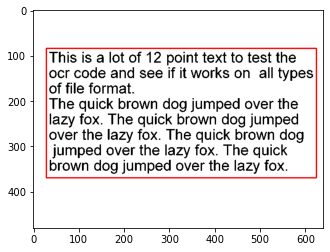

In [14]:
import matplotlib.pyplot as plt

img = cv2.imread(path)
cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Tesseract

In [15]:
print(pytesseract.image_to_string(path))

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



In [16]:
pytesseract.image_to_data(Image.open(path), output_type=Output.DICT)

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,

In [18]:
img = cv2.imread(path)

d = pytesseract.image_to_data(Image.open(path), output_type=Output.DICT)

n_boxes = len(d['level'])

for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

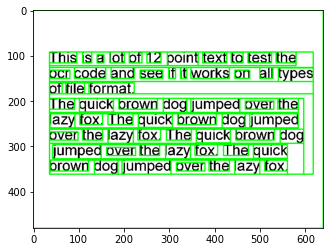

In [19]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))